In [2]:
from mxnet import nd, autograd, gluon
from mxnet.gluon import HybridBlock,nn, loss
import networkx as nx
import networkx.generators.social as socialnx
import matplotlib.pyplot as plt
from networkx import to_numpy_matrix
import numpy as np

import pickle as pkl
import sys
import scipy.sparse as sp

In [3]:
class GraphConvolution(nn.Block):
    # 声明带有模型参数的层，这里声明了两个全连接层
    def __init__(self, A, in_units, out_units, activation, **kwargs):
        super(GraphConvolution, self).__init__(**kwargs)
        I = nd.eye(*A.shape)
        A_hat = A.copy() + I
        
        D = nd.sum(A_hat, axis=0)
        D_inv = D ** -0.5
        D_inv = nd.diag(D_inv)
        A_hat  = D_inv * A_hat * D_inv
        self.in_units, self.out_units = in_units, out_units
        with self.name_scope():
            self.A_hat = self.params.get_constant('A_hat ', A_hat)
            self.W = self.params.get('W', shape=(self.in_units, self.out_units))
            if activation == 'ident':
                self.activation = lambda X: X
            else:
                self.activation = nn.Activation(activation)

    def forward(self, x):
        aggregate = nd.dot(self.A_hat.data(), x)
        propagate = self.activation(nd.dot(aggregate, self.W.data()))
        return propagate

In [4]:
class MLP(nn.Block):
    # 声明带有模型参数的层，这里声明了两个全连接层
    def __init__(self, in_units, out_units, **kwargs):
        super(MLP, self).__init__(**kwargs)
        with self.name_scope():
            self.w = self.params.get('w', shape=(in_units, out_units))
            self.b = self.params.get('b', shape=(out_units, ))
    # 定义模型的前向计算，即如何根据输入x计算返回所需要的模型输出
    def forward(self, x):
        return nd.dot(x.reshape(shape=(-1,)), self.w.data()) + self.b.data()

In [5]:
def showData(output):
    for i in range (34):
        if G.nodes[i]['club'] == 'Mr. Hi':
            plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),color = 'b',alpha=0.5,s = 250)
            plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
            # 为每个点添加标签，一些形如（x轴，y轴，标签）的元组，水平及垂直位置，背景颜色
        else:
            plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label = 'i',color = 'r',alpha=0.5,s = 250)
            plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
            # plt.scatter(np.array(output)[:,0],np.array(output)[:,1],label = 0:33)


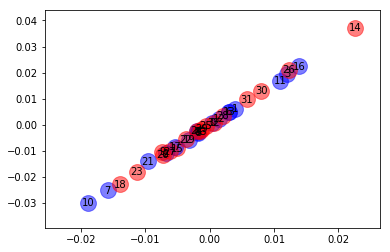

In [6]:
G = socialnx.karate_club_graph()
order = sorted(list(G.nodes()))
A = nd.array(to_numpy_matrix(G, nodelist=order))
net = GraphConvolution(A, in_units=2, out_units=2, activation='tanh')
net.initialize()
X = nd.random.normal(shape=(G.number_of_nodes(),2))
res = net(X).asnumpy()
showData(res)

In [7]:
X


[[ 0.29956347  0.15302546]
 [-1.1688148   1.558071  ]
 [-0.5459446  -2.3556297 ]
 [ 0.54144025  2.6785064 ]
 [ 1.2546344  -0.54877406]
 [-0.68106437 -0.1353156 ]
 [ 0.37723133  0.41016456]
 [ 0.5712682  -2.7579627 ]
 [ 1.07628    -0.6141325 ]
 [ 1.8307649  -1.1468065 ]
 [ 0.05383794 -2.5074806 ]
 [-0.5916499   0.85860497]
 [-0.22794183  0.20131476]
 [ 0.3500547   0.5360521 ]
 [ 1.5194443   1.9040879 ]
 [-1.5734432  -0.14007866]
 [ 0.29670075  1.3111951 ]
 [ 0.15606561 -0.56803983]
 [-0.8062886  -1.200044  ]
 [-1.1877518  -0.15346648]
 [ 0.13385749 -0.7531863 ]
 [ 1.9670967  -1.3998121 ]
 [ 0.43909982 -0.46219134]
 [ 0.25316575 -2.302824  ]
 [ 1.6881202  -0.6523198 ]
 [ 0.89039123 -0.27633253]
 [ 1.9417537   0.7879354 ]
 [-0.85567254 -0.8239901 ]
 [ 0.5187018   0.15364595]
 [ 1.0113305  -0.42647716]
 [ 0.6850326   1.174712  ]
 [ 1.3677438   1.0384175 ]
 [-1.7305615   0.6770596 ]
 [-2.5028148  -0.28589353]]
<NDArray 34x2 @cpu(0)>

In [42]:
layer1 = GraphConvolution(A, in_units=2, out_units=4, activation='tanh')
layer2 = GraphConvolution(A, in_units=4, out_units=1, activation='tanh')
net = nn.Sequential()
net.add(layer1, layer2, MLP(34,34))
net.initialize()
#net(X)
#net.collect_params()

In [45]:
cross_entropy = loss.SigmoidBinaryCrossEntropyLoss(from_sigmoid=True)
trainer = gluon.trainer.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.001, 'momentum': 1})

In [ ]:
feature_representations = [features(X).asnumpy()]
for e in range(1, epochs + 1):
    for i, x in enumerate(X_train):
        y = array(y_train)[i]
        with autograd.record():
            pred = model(X)[x] # Get prediction for sample x
            loss = cross_entropy(pred, y)
        loss.backward()
        trainer.step(1)        
    feature_representations.append(features(X).asnumpy())


In [ ]:
feature_repressentations = [features(X).assnumpy()]
for e in range(1, epochs + 1):
    for i, x in enumerate(X_tarin):
        with autograd.record():
            preds = model(X)[x]
            loss = cross_entropy(preds, y)
        loss.backward()
        trainer.step(1)
    feature_repressentations.append(features(X).asnumpy())

In [71]:
def build_features(A, in_units):
    hidden_layer_specs = [(4, 'tanh'), (1, 'tanh')]
    features = nn.Sequential()
    with features.name_scope():
        for layer_size, activation_func in hidden_layer_specs:
            layer = GraphConvolution(A, in_units=in_units, out_units=layer_size, activation=activation_func)
            features.add(layer)
            in_units = layer_size
    return features

In [81]:
def build_model(A, in_units):
    model = nn.Sequential()
    with model.name_scope():
        features = build_features(A, in_units)
        model.add(features)
        model.add(nn.Dense(4))
        model.initialize()
    return model, features

In [82]:
model, features = build_model(A, X.shape[1])

In [83]:
model(X)


[[ 1.51442451e-04 -1.17235802e-04  8.90990123e-05 -2.42315655e-05]
 [ 1.58019218e-04 -1.22327052e-04  9.29683592e-05 -2.52838818e-05]
 [-3.80426318e-05  2.94498550e-05 -2.23818406e-05  6.08701521e-06]
 [ 4.62064672e-05 -3.57697099e-05  2.71849185e-05 -7.39327061e-06]
 [ 1.92762654e-05 -1.49222915e-05  1.13409160e-05 -3.08430094e-06]
 [ 8.15214880e-05 -6.31080475e-05  4.79620066e-05 -1.30438548e-05]
 [ 6.22751395e-05 -4.82089126e-05  3.66386921e-05 -9.96434028e-06]
 [ 4.56077869e-05 -3.53062533e-05  2.68326930e-05 -7.29747899e-06]
 [-8.43842427e-05  6.53241877e-05 -4.96462708e-05  1.35019109e-05]
 [-1.79432427e-05  1.38903624e-05 -1.05566514e-05  2.87101057e-06]
 [ 4.26944234e-06 -3.30509397e-06  2.51186589e-06 -6.83132612e-07]
 [ 2.15344676e-06 -1.66704297e-06  1.26694988e-06 -3.44562494e-07]
 [-1.34185839e-05  1.03876982e-05 -7.89463320e-06  2.14704210e-06]
 [ 2.52240934e-05 -1.95266712e-05  1.48402360e-05 -4.03598369e-06]
 [-1.07288244e-04  8.30548088e-05 -6.31215153e-05  1.71666670

In [101]:
cross_entropy = loss.SigmoidBinaryCrossEntropyLoss(from_sigmoid=True)
trainer = gluon.Trainer(model.collect_params(), 'sgd', {'learning_rate': 0.001, 'momentum': 1})

In [ ]:
def train(model, features, X, X_train, y_train, epochs):
    feature_repressentations = [features(X).assnumpy()]
    for e in range(1, epochs + 1):
        for i, x in enumerate(X_tarin):
            with autograd.record():
                preds = model(X)[x]
                loss = cross_entropy(preds, y)
            loss.backward()
            trainer.step(1)
        feature_repressentations.append(features(X).asnumpy())
    return feature_repressentations

In [85]:
build_model(A, X)
G = socialnx.karate_club_graph()
order = sorted(list(G.nodes()))
A = nd.array(to_numpy_matrix(G, nodelist=order))
net = GraphConvolution(A, in_units=34, out_units=2, activation='tanh')
net.initialize()
X = nd.array(np.eye(G.number_of_nodes()))
res = net(X).asnumpy()
showData(res)

(Sequential(
   (0): Sequential(
     (0): GraphConvolution(
       (activation): Activation(tanh)
     )
     (1): GraphConvolution(
       (activation): Activation(tanh)
     )
   )
   (1): Dense(None -> 2, linear)
 ), Sequential(
   (0): GraphConvolution(
     (activation): Activation(tanh)
   )
   (1): GraphConvolution(
     (activation): Activation(tanh)
   )
 ))

In [105]:
for i,j in enumerate(['a','b','c']):
    print(i,j)

0 a
1 b
2 c


In [17]:
def parse_index_file(filename):
    """Parse index file."""
    index = []
    for line in open(filename):
        index.append(int(line.strip()))
    return index

def sample_mask(idx, l):
    """Create mask."""
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

def load_data(dataset_str, root_path):
    """
    Loads input data from gcn/data directory

    ind.dataset_str.x => the feature vectors of the training instances as scipy.sparse.csr.csr_matrix object;
    ind.dataset_str.tx => the feature vectors of the test instances as scipy.sparse.csr.csr_matrix object;
    ind.dataset_str.allx => the feature vectors of both labeled and unlabeled training instances
        (a superset of ind.dataset_str.x) as scipy.sparse.csr.csr_matrix object;
    ind.dataset_str.y => the one-hot labels of the labeled training instances as numpy.ndarray object;
    ind.dataset_str.ty => the one-hot labels of the test instances as numpy.ndarray object;
    ind.dataset_str.ally => the labels for instances in ind.dataset_str.allx as numpy.ndarray object;
    ind.dataset_str.graph => a dict in the format {index: [index_of_neighbor_nodes]} as collections.defaultdict
        object;
    ind.dataset_str.test.index => the indices of test instances in graph, for the inductive setting as list object.

    All objects above must be saved using python pickle module.

    :param dataset_str: Dataset name
    :return: All data input files loaded (as well the training/test data).
    """
    names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
    objects = []
    for i in range(len(names)):
        with open("{}/ind.{}.{}".format(root_path, dataset_str, names[i]), 'rb') as f:
            if sys.version_info > (3, 0):
                objects.append(pkl.load(f, encoding='latin1'))
            else:
                objects.append(pkl.load(f))

    x, y, tx, ty, allx, ally, graph = tuple(objects)
    test_idx_reorder = parse_index_file("{}/ind.{}.test.index".format(root_path,dataset_str))
    test_idx_range = np.sort(test_idx_reorder)

    if dataset_str == 'citeseer':
        # Fix citeseer dataset (there are some isolated nodes in the graph)
        # Find isolated nodes, add them as zero-vecs into the right position
        test_idx_range_full = range(min(test_idx_reorder), max(test_idx_reorder)+1)
        tx_extended = sp.lil_matrix((len(test_idx_range_full), x.shape[1]))
        tx_extended[test_idx_range-min(test_idx_range), :] = tx
        tx = tx_extended
        ty_extended = np.zeros((len(test_idx_range_full), y.shape[1]))
        ty_extended[test_idx_range-min(test_idx_range), :] = ty
        ty = ty_extended

    features = sp.vstack((allx, tx)).tolil()
    features[test_idx_reorder, :] = features[test_idx_range, :]
    adj = nx.adjacency_matrix(nx.from_dict_of_lists(graph))

    labels = np.vstack((ally, ty))
    labels[test_idx_reorder, :] = labels[test_idx_range, :]

    idx_test = test_idx_range.tolist()
    idx_train = range(len(y))
    idx_val = range(len(y), len(y)+500)

    train_mask = sample_mask(idx_train, labels.shape[0])
    val_mask = sample_mask(idx_val, labels.shape[0])
    test_mask = sample_mask(idx_test, labels.shape[0])

    y_train = np.zeros(labels.shape)
    y_val = np.zeros(labels.shape)
    y_test = np.zeros(labels.shape)
    y_train[train_mask, :] = labels[train_mask, :]
    y_val[val_mask, :] = labels[val_mask, :]
    y_test[test_mask, :] = labels[test_mask, :]

    return adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask

In [18]:
names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
dataset_str = 'cora'
objects = []
for i in range(len(names)):
    with open("E:/wx/2019上课题/gcn-master/gcn/data/ind.{}.{}".format(dataset_str, names[i]), 'rb') as f:
        if sys.version_info > (3, 0):
            objects.append(pkl.load(f, encoding='latin1'))
adj, features, y_train, y_val, y_test, train_mask, val_mask, test_mask = load_data('cora', "E:/wx/2019上课题/gcn-master/gcn/data")

In [29]:
y_train.shape

(2708, 7)